In [3]:
# Importazione e dati vari
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.constant import DIR_CLEANED_DATA, DIR_BAR, DIR_CARTESIAN
from time import time
from tqdm import tqdm
import os


# Definire le fasce d'età
age_columns = {
    'Age_0_9': "Fascia 0-9 anni", 
    'Age_9_19': "Fascia 9-19 anni", 
    'Age_19_29': "Fascia 19-29 anni", 
    'Age_29_39': "Fascia 29-39 anni", 
    'Age_39_49': "Fascia 39-49 anni",
    'Age_49_59': "Fascia 49-59 anni", 
    'Age_59_69': "Fascia 59-69 anni", 
    'Age_69_79': "Fascia 69-79 anni", 
    'Age_79_89': "Fascia 79-89 anni", 
    'Age_89_99': "Fascia 89-99 anni", 
    'Age_99_109': "Fascia 99+ anni"
}

# Dati utili per creare i grafici
file_path = DIR_CLEANED_DATA + 'merged_dataset1726240449.parquet'
data = pd.read_parquet(file_path)

### Creazione Istogrammi per fascie di età divisi tra maschi e femmine in ogni anno
Tutti i dati sono salvati in `charts/bar/population_hist_<numero>`

In [2]:
def plot_population_by_age_and_sex(data, year_to_analyze, territory_to_analyze, output_dir):
    data_filtered = data[(data['Year'] == year_to_analyze) & (data['Territory'] == territory_to_analyze)]

    male_data = data_filtered[data_filtered['Sex'] == 1]
    female_data = data_filtered[data_filtered['Sex'] == 2]


    # Assicurati che le colonne esistano nel dataframe
    age_keys = list(age_columns.keys())
    if not all(key in male_data.columns for key in age_keys) or not all(key in female_data.columns for key in age_keys):
        raise ValueError("Le colonne delle fasce di età non sono presenti nel dataframe.")

    male_population = male_data[age_keys].sum().values
    female_population = female_data[age_keys].sum().values

    bar_width = 0.4
    indices = np.arange(len(age_columns))

    plt.figure(figsize=(10, 8))

    plt.barh(indices - bar_width/2, male_population, bar_width, color='blue', label='Maschi')
    plt.barh(indices + bar_width/2, female_population, bar_width, color='violet', label='Femmine')

    plt.yticks(indices, list(age_columns.values()))

    plt.xlabel('Popolazione')
    plt.ylabel('Fascia di Età')
    plt.title(f'Popolazione per Fascia di Età e Sesso in {territory_to_analyze} nell\'anno {year_to_analyze}')

    plt.legend()
    plt.grid(axis='x', linestyle='--')

    # Salvare il grafico in formato JPEG
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    plt.savefig(os.path.join(output_dir, f'population_{year_to_analyze}.jpeg'))
    plt.close()


# Esempio di utilizzo della funzione
print("Starting create charts...")
output_dir = DIR_BAR + f'population_hist_{int(time())}'

for year in tqdm(range(1952, 2024)): 
    plot_population_by_age_and_sex(data, year, 'Italia', output_dir)

print("Done!")

## Creazione del grafico cartesiono per ogni fascia di eta

Starting drawing...
Starting create charts...
[33    7621822
Name: Age_0_9, dtype: int64, 78    7624632
Name: Age_0_9, dtype: int64, 88    7683768
Name: Age_0_9, dtype: int64, 143    7771660
Name: Age_0_9, dtype: int64, 200    7678724
Name: Age_0_9, dtype: int64, 244    7593568
Name: Age_0_9, dtype: int64, 255    7500956
Name: Age_0_9, dtype: int64, 305    7472352
Name: Age_0_9, dtype: int64, 367    7484078
Name: Age_0_9, dtype: int64, 410    7540808
Name: Age_0_9, dtype: int64]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (73,) + inhomogeneous part.

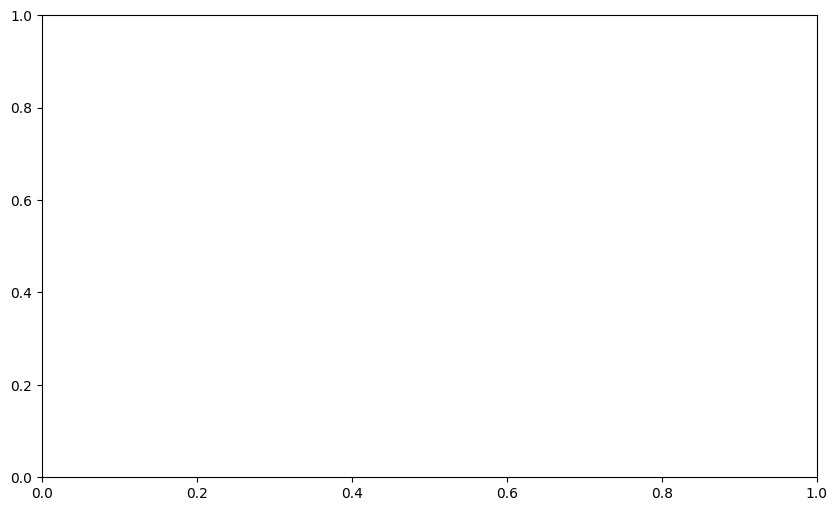

In [12]:
def plot_age_group_growth(data, age_start, age_end, territory, output_dir):
    years = np.arange(1952, 2025)
    
    format_col_age = f"Age_{age_start}_{age_end}"

    if format_col_age not in age_columns.keys():
        raise Exception()
    
    age_group = data[(data['Territory'] == territory)]
    
    male_population = []
    female_population = []
    
    for year in years:
        year_data = age_group[age_group['Year'] == year]
        male_population.append(year_data[year_data['Sex'] == 1][format_col_age])
        female_population.append(year_data[year_data['Sex'] == 2][format_col_age])
    
    plt.figure(figsize=(10, 6))
    print(male_population[:10])
    plt.plot(years, male_population, label='Maschi', color='blue')
    plt.plot(years, female_population, label='Femmine', color='red')
    
    plt.xlabel('Anno')
    plt.ylabel('Popolazione')
    plt.title(f'Crescita della popolazione per la fascia di età {age_start}-{age_end} anni in {territory}')
    plt.legend()
    plt.grid(True)

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    output_path = os.path.join(output_dir, f'age_group_{age_start}_{age_end}_{territory}.png')
    plt.savefig(output_path)
    plt.close()

print("Starting drawing...")

print("Starting create charts...")
output_dir = DIR_CARTESIAN + f'age_popolation_{int(time())}'

ante = 0
for post in range(9, 99, 9):
    plot_age_group_growth(data, ante, post, "Italia", output_dir)

print("Done!")
